# Mask R-CNN - Inspect Whale Masks

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import imgaug
from imgaug import augmenters as iaa

# Root directory of the project
MASK_RCNN_DIR = os.path.abspath("../Mask_RCNN/")
ROOT_DIR = os.path.abspath(".")

# Import Mask RCNN
sys.path.append(MASK_RCNN_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.whales import whale

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(MASK_RCNN_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases

WHALE_WEIGHTS_PATH = "/home/clifgray/Code/Mask_RCNN/logs/whale20180613T0247/mask_rcnn_whale_0075.h5"
#WHALE_WEIGHTS_PATH = "/home/clifgray/Code/Mask_RCNN/logs/whale20180528T1952/mask_rcnn_whale_0030.h5"  # TODO: update this path

Using TensorFlow backend.


## Configurations

In [7]:
config = whale.WhaleConfig()
WHALE_DIR = MASK_RCNN_DIR = os.path.abspath("../photogram_data/")
WHALE_DIR

'/home/clifgray/Code/photogram_data'

In [8]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [56, 56]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9

## Notebook Preferences

In [9]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [10]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [11]:
# Load validation dataset
dataset = whale.WhaleDataset()
dataset.load_whale(WHALE_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 93
Classes: ['BG', 'megaptera_novaeangliae_body', 'megaptera_novaeangliae_pectoral']


## Mask Experimentation

In [7]:
# Dataset Information, how the images are mapped to IDs

idArray = np.arange(len(dataset.image_ids)) #54 images in this set

for num in idArray:
    image_id = num
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
   # print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, dataset.image_reference(image_id)))

KeyboardInterrupt: 

In [6]:
import numpy.ma as ma
import scipy.misc
import skimage.morphology

#Image to work with - IDs 19-35 have actual measurements

image_id = 19


image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset, config, image_id, use_mini_mask=False)
log("molded_image", image)
log("mask", mask)
print("mask.shape", mask.shape)

molded_image             shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
mask.shape (1024, 1024, 1)


In [15]:
mask = mask[:,:,0]

In [16]:
dilated = skimage.morphology.binary_dilation(mask)

In [17]:
dilated.shape

(1024, 1024)

In [ ]:
#plt.plot(dilated)

In [ ]:
# Dataset Information, how the images are mapped to IDs

idArray = np.arange(len(dataset.image_ids)) #54 images in this set

for num in idArray:
    image_id = num
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]
   # print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, dataset.image_reference(image_id)))

molded_image             shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 6)       min:    0.00000  max:    1.00000  bool
mask.shape (1024, 1024, 6)


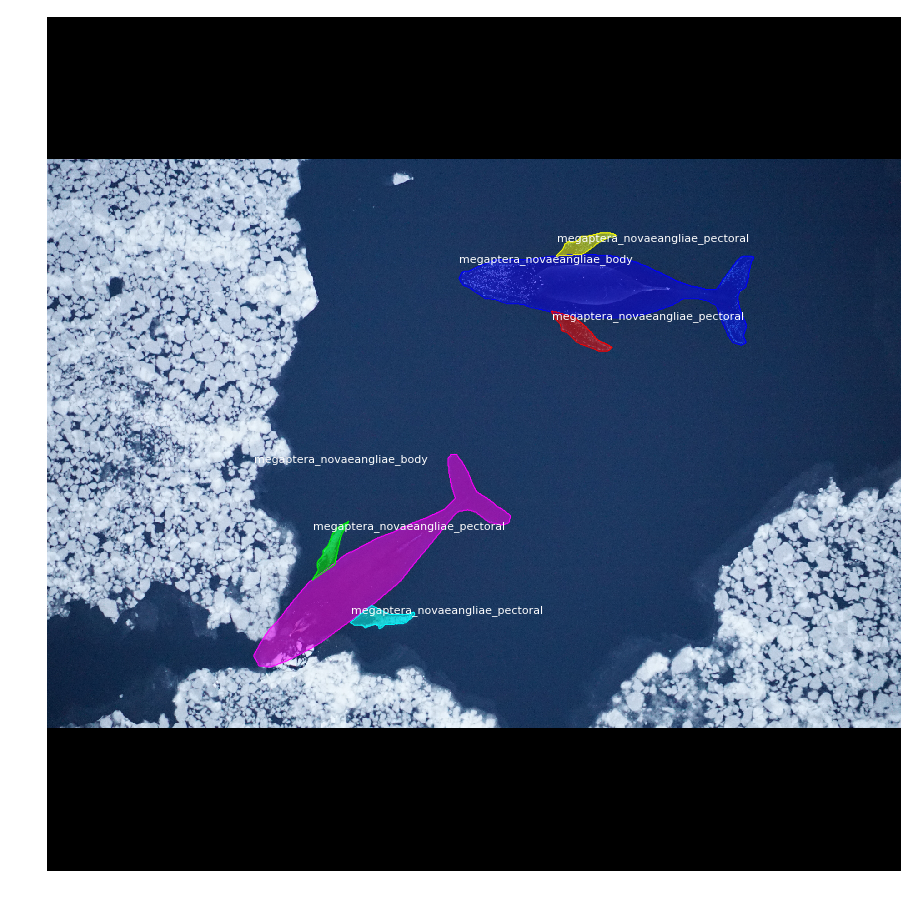

Number of masks 6


In [7]:
import numpy.ma as ma
import scipy.misc

#Image to work with - IDs 19-35 have actual measurements

image_id = 5


image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset, config, image_id, use_mini_mask=False)
log("molded_image", image)
log("mask", mask)
print("mask.shape", mask.shape)

visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names, show_bbox=False)


#Find which mask to use - one with the largest number of pixels
numOfMasks = np.size(mask, 2)
print("Number of masks", numOfMasks)
i = 0
pixcount = 0
pixCountArray = []
while i < numOfMasks:
    currentMask = (mask[:, :, i])
    pixcount = 0
    nonzero = np.nonzero(currentMask)
    it2 = np.nditer(currentMask, flags =['multi_index'])
    while not it2.finished:
        if it2[0] == True:
            pixcount = pixcount + 1
        it2.iternext()
    pixCountArray.append(pixcount)
    i = i+1

#Find max in pixCountArray - gets the biggest mask that will be the body
correctIndex = pixCountArray.index(max(pixCountArray))
body = (mask[:,:,correctIndex])
            


## Running PCA to get major axis of whale image

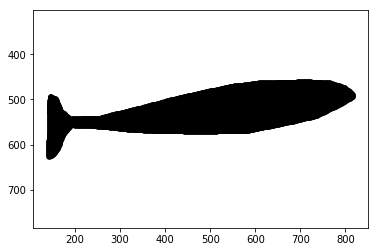

In [10]:
#import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import skimage.filters

# get indexes of mask pixels
y, x = np.nonzero(body)

# print the whale mask
plt.plot(x, y, 'k.')
plt.axis('equal')
plt.gca().invert_yaxis()  # Match the image system with origin at top left
plt.show()


0.9941175202027311 -0.10830676814480525
0.10830676814480525 0.9941175202027311


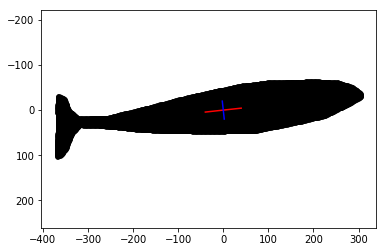

In [11]:
# mean center the coords
x = x - np.mean(x)
y = y - np.mean(y)
coords = np.vstack([x, y])

# build covariance matreix and eigenvectors
cov = np.cov(coords)
evals, evecs = np.linalg.eig(cov)

# sort eigenvalues
sort_indices = np.argsort(evals)[::-1]
x_v1, y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
x_v2, y_v2 = evecs[:, sort_indices[1]]

print(x_v1, y_v1)
print(x_v2, y_v2)

# plot the major and minor axis of the whale mask
scale = 20
plt.plot(x, y, 'k.')

plt.plot([x_v1*-scale*2, x_v1*scale*2],
         [y_v1*-scale*2, y_v1*scale*2], color='red')
plt.plot([x_v2*-scale, x_v2*scale],
         [y_v2*-scale, y_v2*scale], color='blue')
plt.axis('equal')
plt.gca().invert_yaxis()  # Match the image system with origin at top left
plt.show()

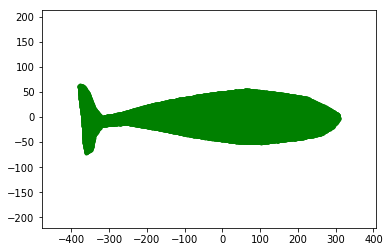

In [12]:
# orient this along the horizontal axis
theta = np.tanh((x_v2)/(y_v2))  
rotation_mat = np.matrix([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
transformed_mat = rotation_mat * coords
# plot the transformed blob
#these are the final transformed coords
x_transformed, y_transformed = transformed_mat.A

maxX = np.max(x_transformed)
minX = np.min(x_transformed)
maxY = np.max(y_transformed)
minY = np.min(y_transformed)

plt.xlim([minX - 100, maxX + 100])
plt.ylim([minY - 150, maxY + 150])


plt.plot(x_transformed, y_transformed, 'g.')
plt.show()

In [13]:
# 0.0003917m is pixel at natural image size
natural_pixel_size = 0.0003917
size_factor = float(6000 / 1024)
pixel_size = natural_pixel_size* size_factor

# visual length calculation at estimated altitude of ~75m 
480*0.03




14.399999999999999

maxY 63.09503816909775
minY -71.00253601934376


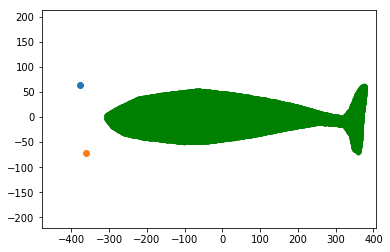

In [14]:
#Orient the mask correctly - flip so the fluke is on the right

#See where maxY and minY are - if negative X values, need to flip
#Find max/min Y values - Girth
maxY = np.max(y_transformed)
minY = np.min(y_transformed)

print("maxY", maxY)
print("minY", minY)

#Get corresonding X values for maxY and minY

maxY_index = np.where(y_transformed == maxY) #index of top point
topX = float((x_transformed[maxY_index])) #corresponding X value
plt.scatter(topX, maxY)


minY_index = np.where(y_transformed == minY) #index of bottom point
bottomX = float((x_transformed[minY_index])) #corresponding X value
plt.scatter(bottomX, minY)

#If negative, flip mask about the y-axis 
if (topX < 0 or bottomX < 0):
   x_transformed = x_transformed*-1 


plt.xlim([minX - 100, maxX + 100])
plt.ylim([minY - 150, maxY + 150])

plt.plot(x_transformed, y_transformed, 'g.')


Image ID 19
maxX 378.5143697603254
minX -307.6778373657629


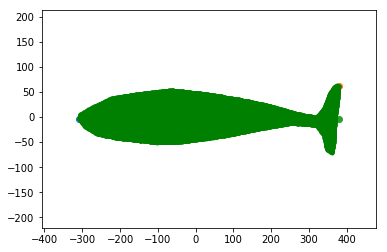

In [15]:
print("Image ID", image_id)

#Find max/min X values

maxX = np.max(x_transformed) #rightX
minX = np.min(x_transformed) #leftX
print("maxX", maxX)
print("minX", minX)


#Get corresonding Y values for leftX and rightX

maxX_index = np.where(x_transformed == maxX) #index of right-most point
rightY = float((y_transformed[maxX_index])) #corresponding Y value
#plt.scatter(maxX, rightY)


minX_index = np.where(x_transformed == minX) #index of left-most point
leftY = float((y_transformed[minX_index])) #corresponding Y value

#Setting up the plot
plt.xlim([minX - 100, maxX + 100])
plt.ylim([minY - 150, maxY + 150])

plt.scatter(minX, leftY)
plt.scatter(maxX, rightY)
plt.scatter(maxX, leftY)


plt.plot(x_transformed, y_transformed, 'g.')

## Girth

In [16]:
print(x_transformed)
print(y_transformed)

step = length_in_pixels / 20 #in pixels

#get the x values along the midline


[-187.33150704 -188.32562467 -189.31974229 ...  377.52025213  376.5261345
  375.53201687]
[-43.57104573 -43.46273996 -43.35443419 ...  62.87842664  62.9867324
  63.09503817]


Image ID 19
yValues len 678
length in pixels 3896.1713206879735
***L2 3896.1746614467884
height of line 0.8721693268278727


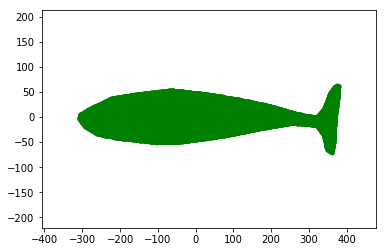

In [17]:
print("Image ID", image_id)

#Get points from leftX and rightX until it runs off the mask

#Filter out points above straight line 
#Arbitrary lambda, might need to change later
lowEnough = list(filter(lambda y: y < (leftY + 0.5), y_transformed))
yValues = list(filter(lambda y: y > (leftY - 0.5), lowEnough)) 
print("yValues len", len(yValues)) #414 points

#Get corresponding X values
#List of appropriate indices
indices = []
for point in yValues:
    index = int(np.where(y_transformed == point)[0])
    indices.append(index)
#print("num of indices", len(indices))
xValues = [] #Corresponding X values
for index in indices:
    xValues.append(x_transformed[index])
#print("Xlength", len(xValues))

newIndexList = np.arange(len(indices)) # gets the correct indices for iteration, 0-414
'''for index in newIndexList:
    plt.scatter(xValues[index], highEnough[index])'''
    
#Plot the first and last points from the list, use this for length?
plt.scatter(xValues[0], yValues[0])
plt.scatter(xValues[-1], yValues[-1])

#Get length in pixels
length = abs(xValues[-1] - xValues[0]) * 5.85
length2 = math.sqrt((xValues[-1] - xValues[0])**2 + (yValues[-1] - yValues[0])**2) * 5.85
print("length in pixels", length)
print("***L2", length2)


'''avgY = (sum(y_transformed) / len(y_transformed))

distance = math.sqrt((xValues[0] - xValues[-1])**2 + (yValues[0] - avgY)**2)*5.85
print("Distance Using Average Y", distance)
plt.scatter(xValues[-1], avgY)'''


heightOfLine = abs(yValues[-1] - yValues[0])
print("height of line", heightOfLine) #should be close to zero
'''
#Calculating real length from length in pixels
natural_pixel_size = 0.0003917 # 0.0003917m is pixel at natural image size
size_factor = float(6000 / 1024)
pixel_size = natural_pixel_size* size_factor

realLength = pixel_size * length
print("***Real length***", realLength) #get 1.419, off by a factor of 10? 14.2 seems reasonable
'''

#Setting up the plot
plt.xlim([minX - 100, maxX + 100])
plt.ylim([minY - 150, maxY + 150])



#5.85x pixel count

plt.plot(x_transformed, y_transformed, 'g.')


-1.2158620944526105e-14
-1.7142988685810713e-14


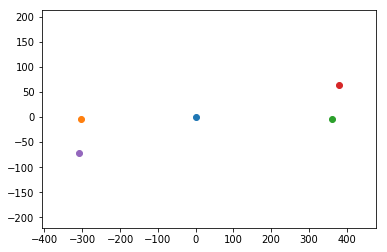

In [18]:
#Find middle of the whale

avgX = (sum(x_transformed) / len(x_transformed))
print(avgX)

avgY = (sum(y_transformed) / len(y_transformed))
print(avgY)

#Setting up the plot
plt.xlim([minX - 100, maxX + 100])
plt.ylim([minY - 150, maxY + 150])

#plt.plot(x_transformed, y_transformed, 'g.')
plt.scatter(avgX, avgY)
plt.scatter(xValues[0], yValues[0])
plt.scatter(xValues[-1], yValues[-1])

plt.scatter(maxX, maxY)
plt.scatter(minX, minY)

#Find distance between the 3 points 
#distance1 = (math.sqrt((avgX - minX)**2 + (avgY - minY)**2)) + (math.sqrt((maxX - avgX)**2 + (maxY - avgY)**2))
distance = math.sqrt((maxX - minX)**2 + (maxY - minY)**2)
#print("Distance", distance)
#print("Distance with avg", distance1)
#print("FINAL DISTANCE", distance*5.85)

Whale # 19
avgX -1.2158620944526105e-14
avgY -1.7142988685810713e-14
distance3 3919.4369941445375
*******************


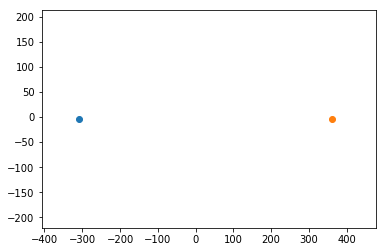

In [19]:
#Setting up the plot
plt.xlim([minX - 100, maxX + 100])
plt.ylim([minY - 150, maxY + 150])

    #Find middle of the whale
print("Whale #", image_id)
avgX = (sum(x_transformed) / len(x_transformed))
print("avgX", avgX)

avgY = (sum(y_transformed) / len(y_transformed))
print("avgY", avgY)
    
#plt.plot(x_transformed, y_transformed, 'g.')
#plt.scatter(avgX, avgY)
#plt.scatter(xValues[0], yValues[0])
#plt.scatter(xValues[-1], yValues[-1])
#plt.scatter(maxX, maxY)
#plt.scatter(minX, minY)

plt.scatter(minX, yValues[0])
plt.scatter(xValues[-1], yValues[-1])

#Find distance between the 3 points 
'''distance1 = (math.sqrt((avgX - minX)**2 + (avgY - minY)**2)) + (math.sqrt((maxX - avgX)**2 + (maxY - avgY)**2))
distance = math.sqrt((maxX - minX)**2 + (maxY - minY)**2)'''



distance3 = math.sqrt((xValues[-1] - minX)**2 + (yValues[-1] - yValues[0])**2)

#print("Distance", distance)
#print("Distance with avg", distance1*5.85)
#print(distance*5.85)
print("distance3", distance3 * 5.85)
print("*******************")

## Load Model

In [20]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [21]:
# Set path to balloon weights file

# Download file from the Releases page and set its path
# https://github.com/matterport/Mask_RCNN/releases
# weights_path = "/path/to/mask_rcnn_whale_N.h5"

# choose model weights path
#weights_path = /home/clifgray/Code/Mask_RCNN/logs/whale20180601T0235/mask_rcnn_whale_0030.h5


# Or, load the last model you trained
weights_path = model.find_last()[1]

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)
print("Weights loaded.")

Loading weights  /home/clifgray/Code/Mask_RCNN/logs/whale20180613T0247/mask_rcnn_whale_0150.h5
Weights loaded.


## Run Detection

image ID: whale.DSC04471.JPG (31) /home/clifgray/Code/Mask_RCNN/datasets/whale_training/blue/train/DSC04471.JPG
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (3,)                  min:    1.00000  max:    2.00000  int32
gt_bbox                  shape: (3, 4)                min:  192.00000  max:  788.00000  int32
gt_mask                  shape: (1024, 1024, 3)       min:    0.00000  max:    1.00000  bool


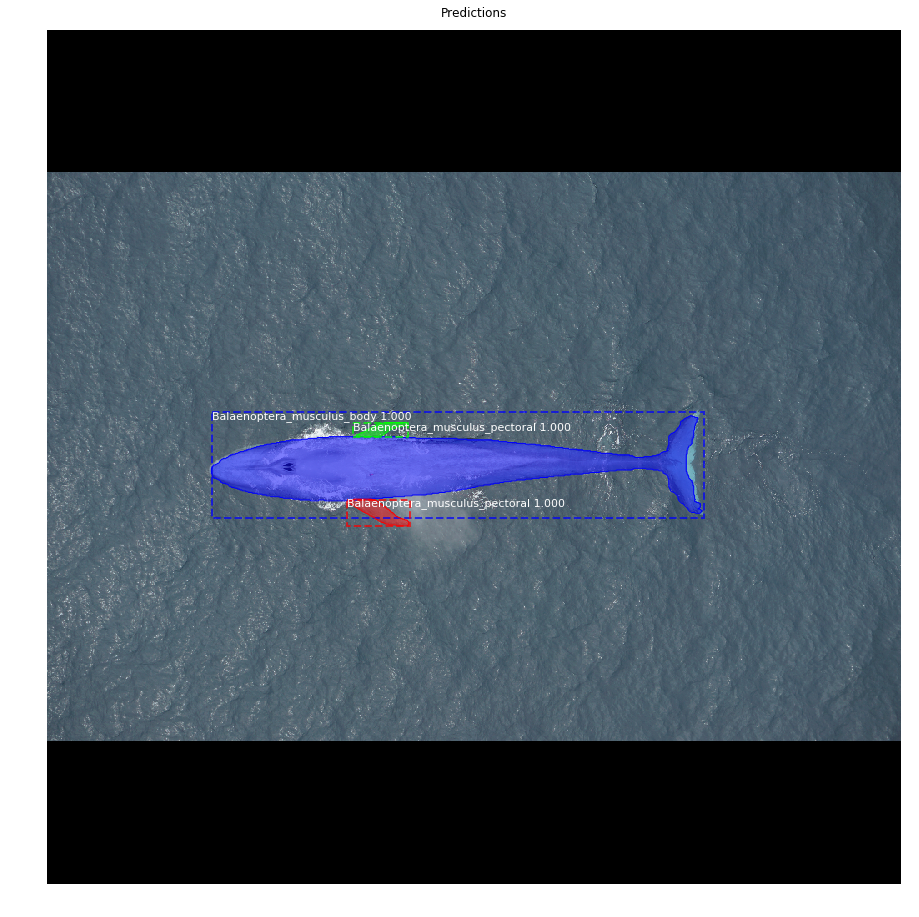

In [22]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

## Image Augmentation


In [23]:
# List of augmentations
# http://imgaug.readthedocs.io/en/latest/source/augmenters.html
augmentation = iaa.Sometimes(0.9, [
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Multiply((0.8, 1.2)),
    iaa.GaussianBlur(sigma=(0.0, 5.0))
])

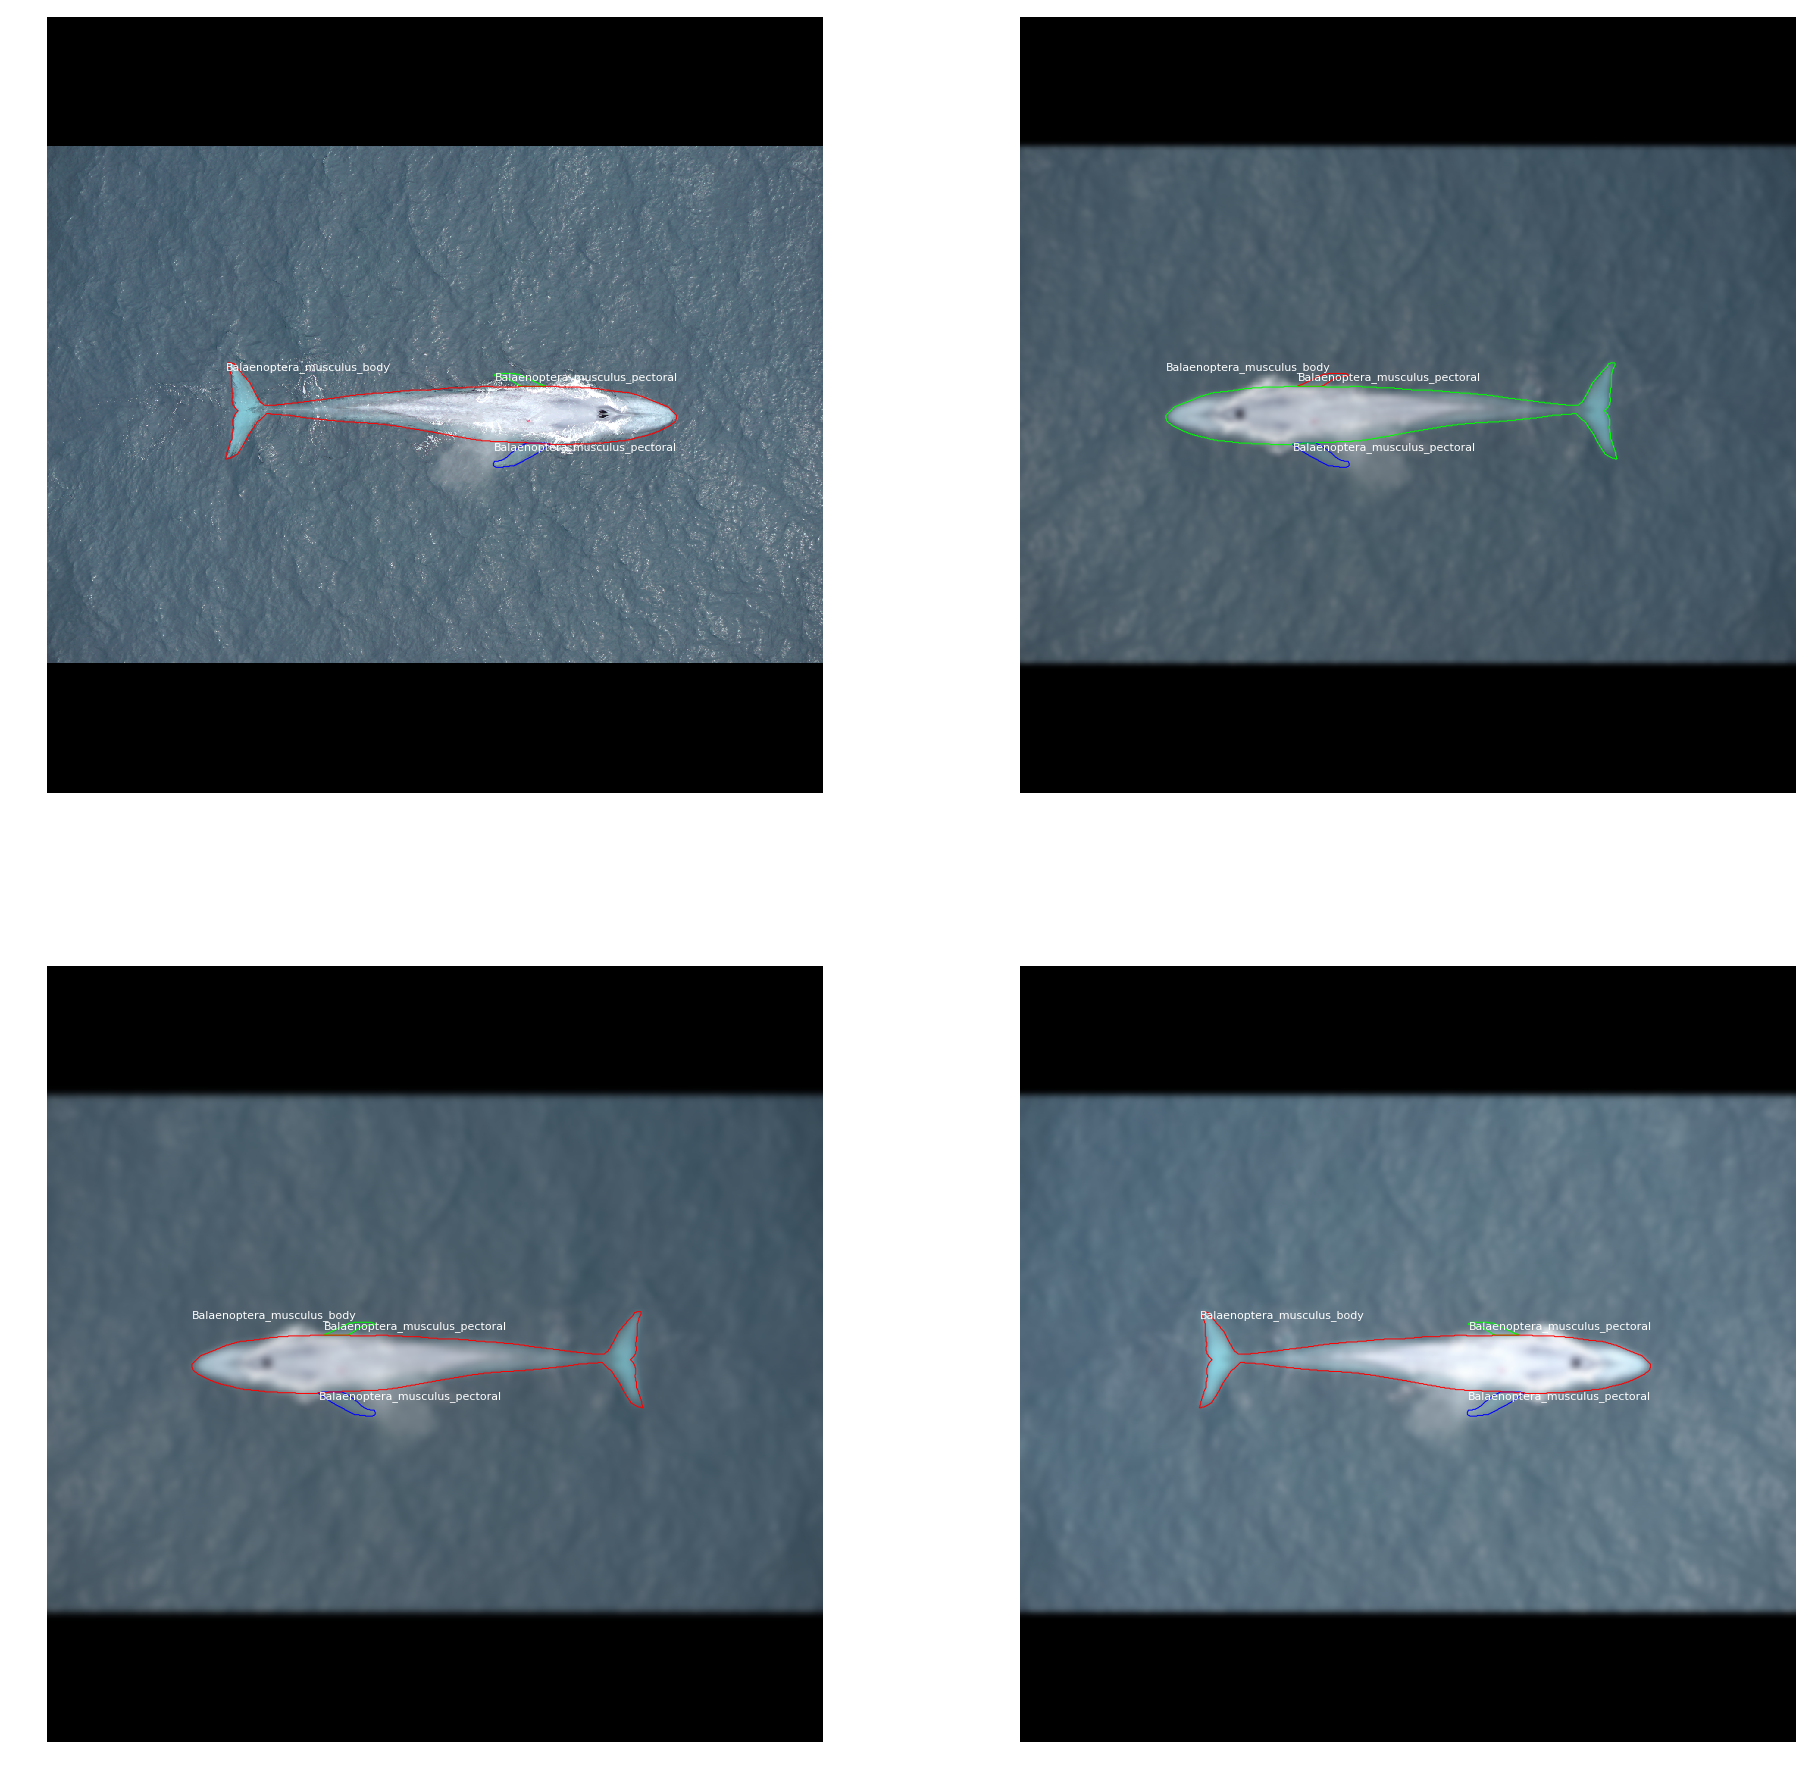

In [24]:
# Load the image multiple times to show augmentations
limit = 4
ax = get_ax(rows=2, cols=limit//2)
for i in range(limit):
    image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset, config, image_id, use_mini_mask=False, augment=False, augmentation=augmentation)
    visualize.display_instances(image, bbox, mask, class_ids,
                                dataset.class_names, ax=ax[i//2, i % 2],
                                show_mask=False, show_bbox=False)

# -----Extra Stuff-----Stop Here----- 

## Color Splash

This is for illustration. You can call `balloon.py` with the `splash` option to get better images without the black padding.

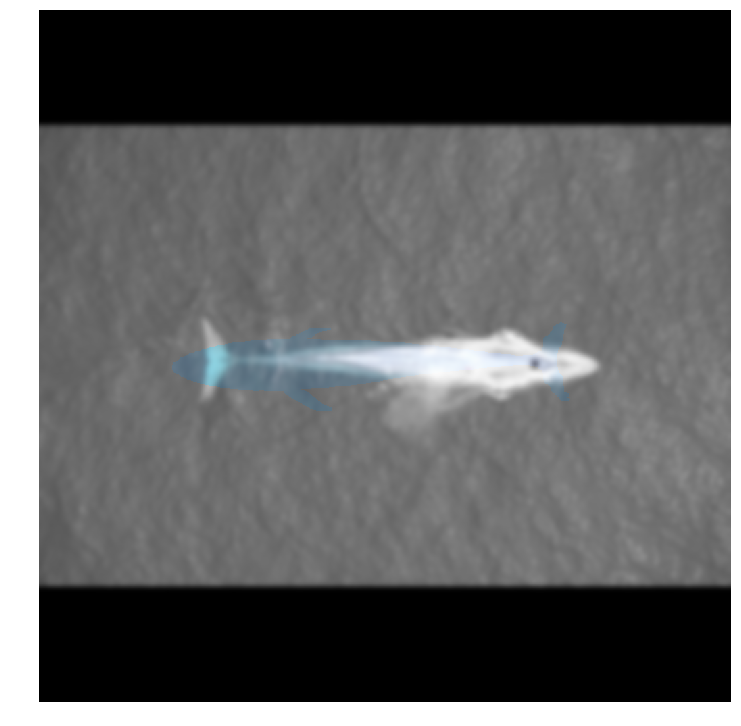

In [25]:
splash = whale.color_splash(image, r['masks'])
display_images([splash], cols=1)

## Step by Step Prediction

## Stage 1: Region Proposal Network

The Region Proposal Network (RPN) runs a lightweight binary classifier on a lot of boxes (anchors) over the image and returns object/no-object scores. Anchors with high *objectness* score (positive anchors) are passed to the stage two to be classified.

Often, even positive anchors don't cover objects fully. So the RPN also regresses a refinement (a delta in location and size) to be applied to the anchors to shift it and resize it a bit to the correct boundaries of the object.

### 1.a RPN Targets

The RPN targets are the training values for the RPN. To generate the targets, we start with a grid of anchors that cover the full image at different scales, and then we compute the IoU of the anchors with ground truth object. Positive anchors are those that have an IoU >= 0.7 with any ground truth object, and negative anchors are those that don't cover any object by more than 0.3 IoU. Anchors in between (i.e. cover an object by IoU >= 0.3 but < 0.7) are considered neutral and excluded from training.

To train the RPN regressor, we also compute the shift and resizing needed to make the anchor cover the ground truth object completely.

In [26]:
# Generate RPN trainig targets
# target_rpn_match is 1 for positive anchors, -1 for negative anchors
# and 0 for neutral anchors.
target_rpn_match, target_rpn_bbox = modellib.build_rpn_targets(
    image.shape, model.anchors, gt_class_id, gt_bbox, model.config)
log("target_rpn_match", target_rpn_match)
log("target_rpn_bbox", target_rpn_bbox)

positive_anchor_ix = np.where(target_rpn_match[:] == 1)[0]
negative_anchor_ix = np.where(target_rpn_match[:] == -1)[0]
neutral_anchor_ix = np.where(target_rpn_match[:] == 0)[0]
positive_anchors = model.anchors[positive_anchor_ix]
negative_anchors = model.anchors[negative_anchor_ix]
neutral_anchors = model.anchors[neutral_anchor_ix]
log("positive_anchors", positive_anchors)
log("negative_anchors", negative_anchors)
log("neutral anchors", neutral_anchors)

# Apply refinement deltas to positive anchors
refined_anchors = utils.apply_box_deltas(
    positive_anchors,
    target_rpn_bbox[:positive_anchors.shape[0]] * model.config.RPN_BBOX_STD_DEV)
log("refined_anchors", refined_anchors, )


target_rpn_match         shape: (261888,)             min:   -1.00000  max:    1.00000  int32
target_rpn_bbox          shape: (256, 4)              min:   -1.77208  max:    2.92786  float64
positive_anchors         shape: (3, 4)                min:  202.98066  max:  602.50967  float64
negative_anchors         shape: (253, 4)              min:  -96.00000  max: 1120.00000  float64
neutral anchors          shape: (261632, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (3, 4)                min:  191.99997  max:  788.00000  float32


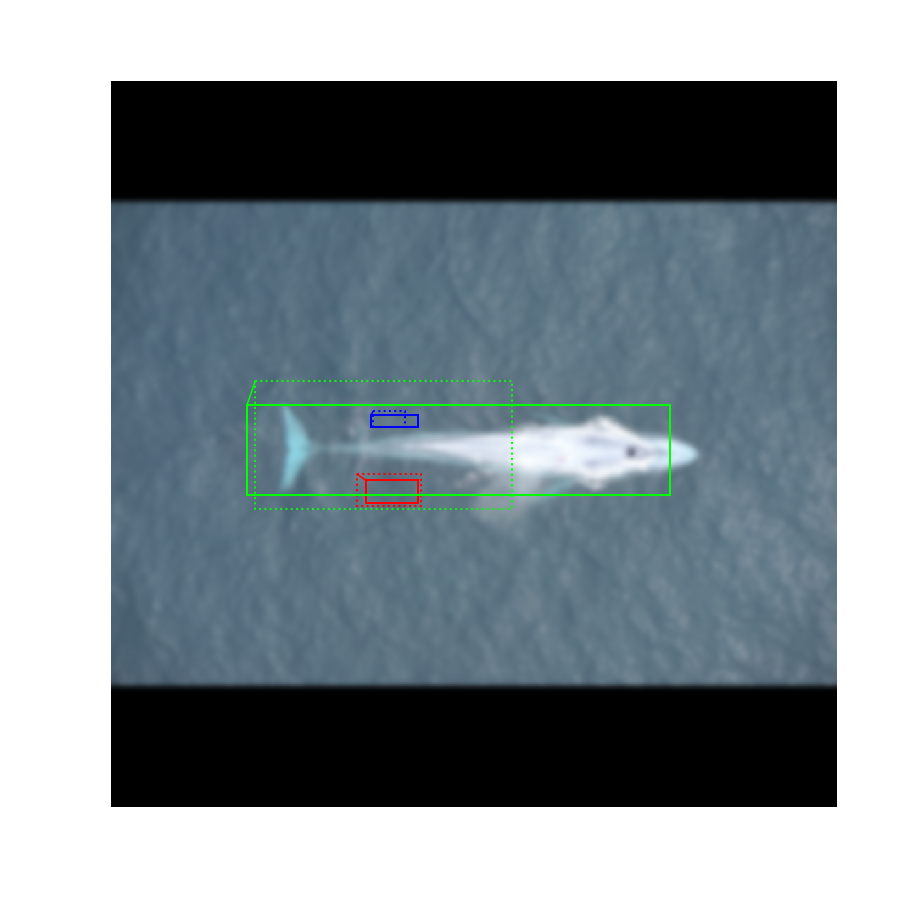

In [27]:
# Display positive anchors before refinement (dotted) and
# after refinement (solid).
visualize.draw_boxes(image, boxes=positive_anchors, refined_boxes=refined_anchors, ax=get_ax())

### 1.b RPN Predictions

Here we run the RPN graph and display its predictions.

In [28]:
# Run RPN sub-graph
pillar = model.keras_model.get_layer("ROI").output  # node to start searching from

# TF 1.4 introduces a new version of NMS. Search for both names to support TF 1.3 and 1.4
nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression:0")
if nms_node is None:
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV2:0")

rpn = model.run_graph([image], [
    ("rpn_class", model.keras_model.get_layer("rpn_class").output),
    ("pre_nms_anchors", model.ancestor(pillar, "ROI/pre_nms_anchors:0")),
    ("refined_anchors", model.ancestor(pillar, "ROI/refined_anchors:0")),
    ("refined_anchors_clipped", model.ancestor(pillar, "ROI/refined_anchors_clipped:0")),
    ("post_nms_anchor_ix", nms_node),
    ("proposals", model.keras_model.get_layer("ROI").output),
])

rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000  float32
pre_nms_anchors          shape: (1, 6000, 4)          min:   -0.35390  max:    1.29134  float32
refined_anchors          shape: (1, 6000, 4)          min:  -96.29023  max:   97.11079  float32
refined_anchors_clipped  shape: (1, 6000, 4)          min:    0.00000  max:    1.00000  float32
post_nms_anchor_ix       shape: (784,)                min:    0.00000  max: 5973.00000  int32
proposals                shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32


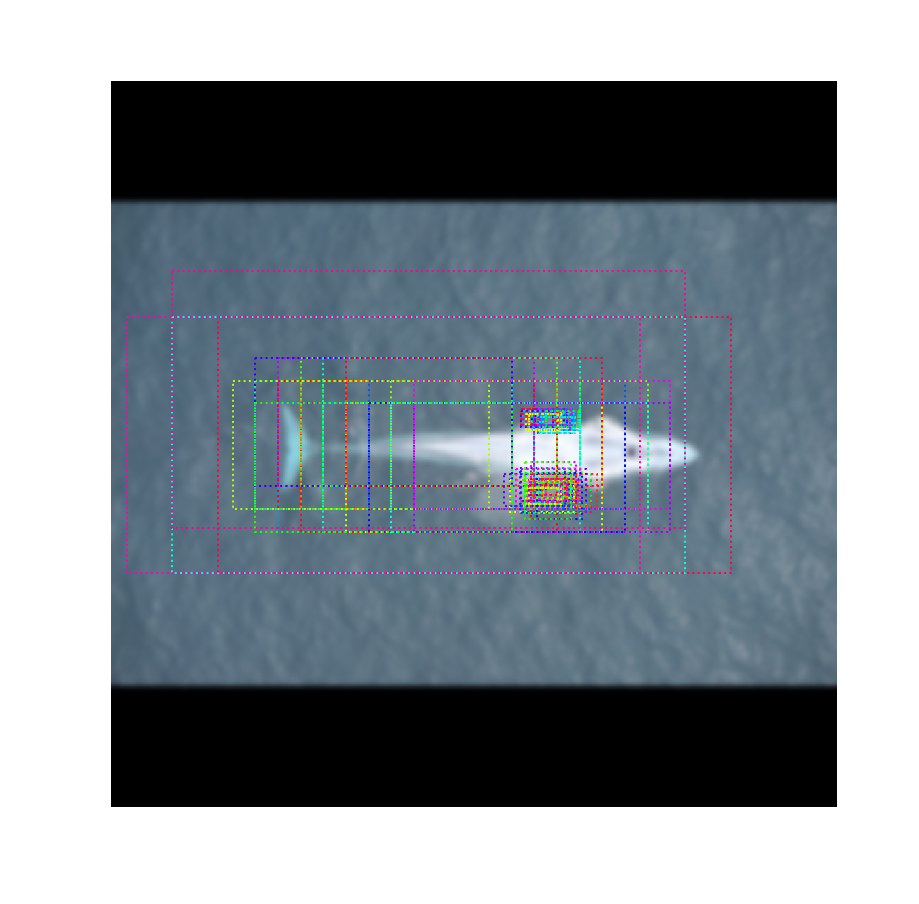

In [29]:
# Show top anchors by score (before refinement)
limit = 100
sorted_anchor_ids = np.argsort(rpn['rpn_class'][:,:,1].flatten())[::-1]
visualize.draw_boxes(image, boxes=model.anchors[sorted_anchor_ids[:limit]], ax=get_ax())

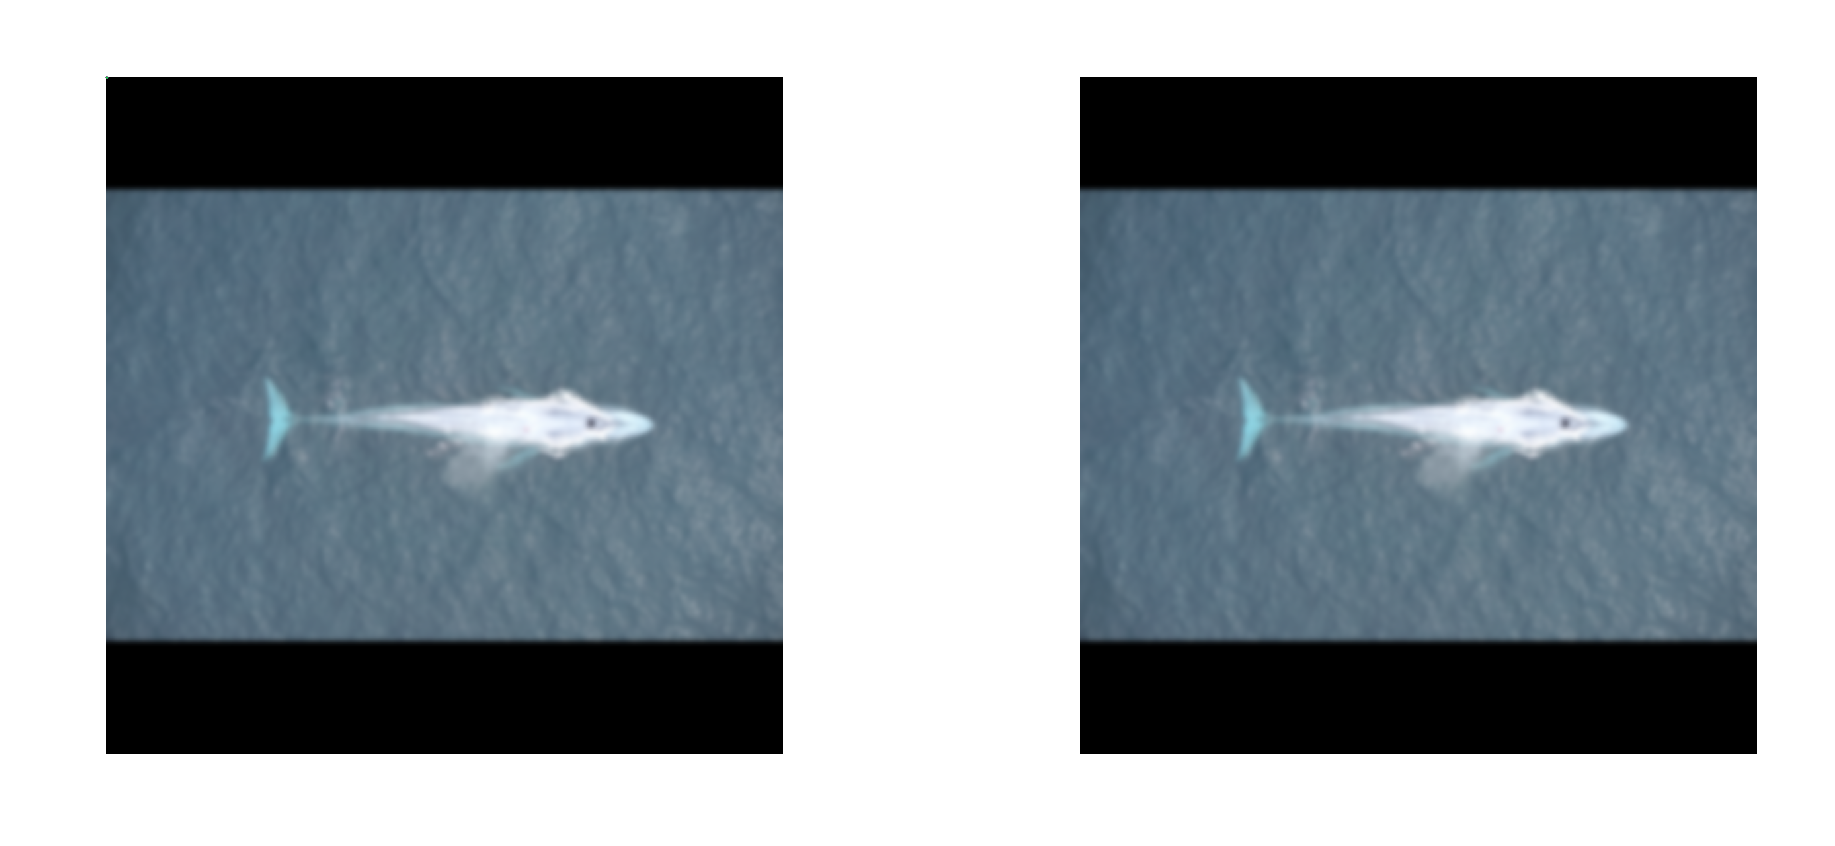

In [30]:
# Show top anchors with refinement. Then with clipping to image boundaries
limit = 50
ax = get_ax(1, 2)
visualize.draw_boxes(image, boxes=rpn["pre_nms_anchors"][0, :limit], 
           refined_boxes=rpn["refined_anchors"][0, :limit], ax=ax[0])
visualize.draw_boxes(image, refined_boxes=rpn["refined_anchors_clipped"][0, :limit], ax=ax[1])

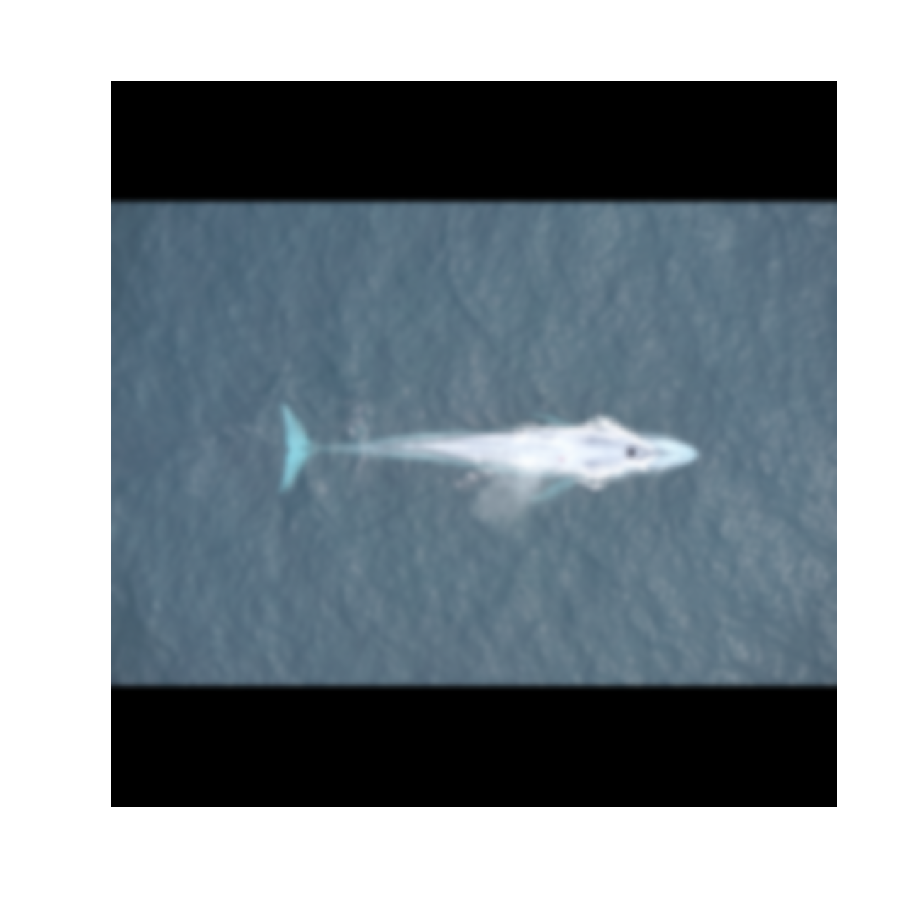

In [31]:
# Show refined anchors after non-max suppression
limit = 50
ixs = rpn["post_nms_anchor_ix"][:limit]
visualize.draw_boxes(image, refined_boxes=rpn["refined_anchors_clipped"][0, ixs], ax=get_ax())

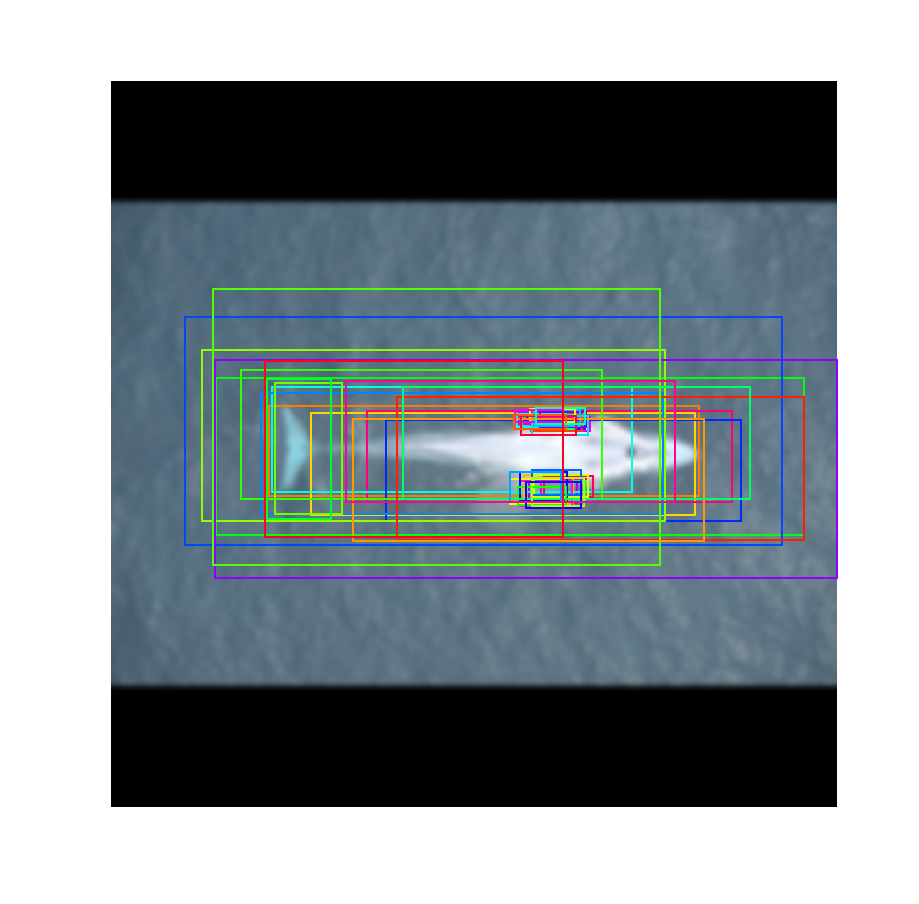

In [32]:
# Show final proposals
# These are the same as the previous step (refined anchors 
# after NMS) but with coordinates normalized to [0, 1] range.
limit = 50
# Convert back to image coordinates for display
h, w = config.IMAGE_SHAPE[:2]
proposals = rpn['proposals'][0, :limit] * np.array([h, w, h, w])
visualize.draw_boxes(image, refined_boxes=proposals, ax=get_ax())

## Stage 2: Proposal Classification

This stage takes the region proposals from the RPN and classifies them.

### 2.a Proposal Classification

Run the classifier heads on proposals to generate class propbabilities and bounding box regressions.

In [33]:
# Get input and output to classifier and mask heads.
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])

proposals                shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32
probs                    shape: (1, 1000, 3)          min:    0.00000  max:    1.00000  float32
deltas                   shape: (1, 1000, 3, 4)       min:   -4.39922  max:    4.76354  float32
masks                    shape: (1, 100, 56, 56, 3)   min:    0.00000  max:    1.00000  float32
detections               shape: (1, 100, 6)           min:    0.00000  max:    2.00000  float32


3 detections: ['Balaenoptera_musculus_body' 'Balaenoptera_musculus_pectoral'
 'Balaenoptera_musculus_pectoral']


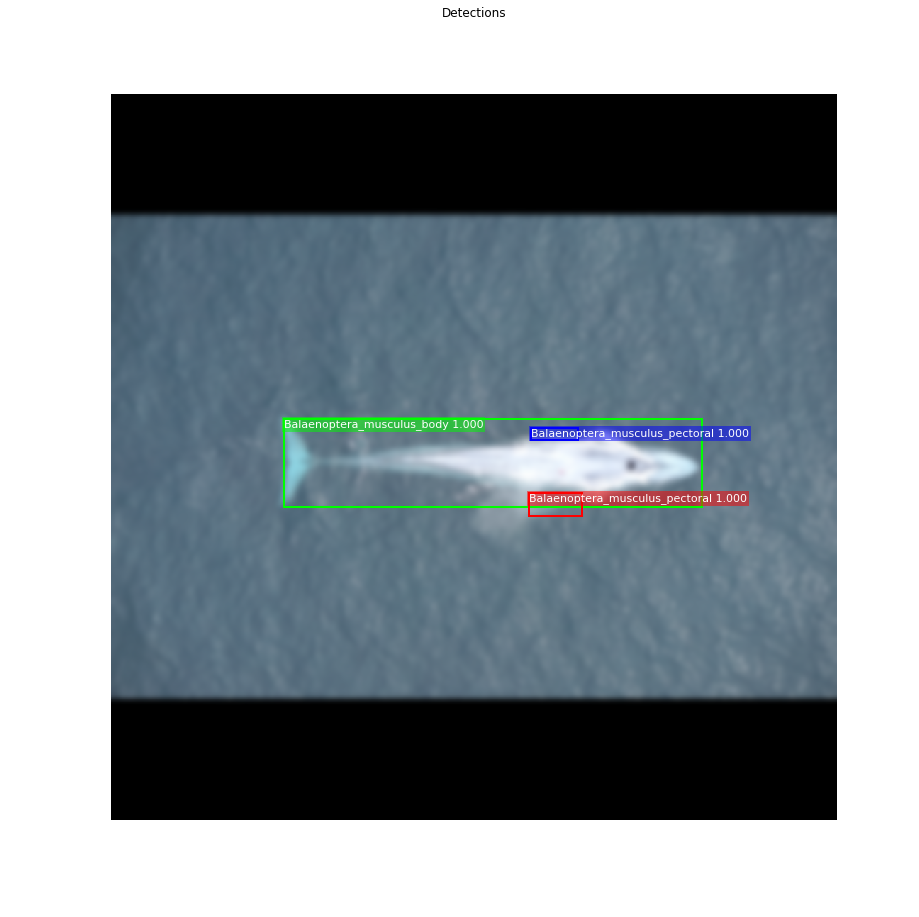

In [34]:
# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

captions = ["{} {:.3f}".format(dataset.class_names[int(c)], s) if c > 0 else ""
            for c, s in zip(detections[:, 4], detections[:, 5])]
visualize.draw_boxes(
    image, 
    refined_boxes=utils.denorm_boxes(detections[:, :4], image.shape[:2]),
    visibilities=[2] * len(detections),
    captions=captions, title="Detections",
    ax=get_ax())

### 2.c Step by Step Detection

Here we dive deeper into the process of processing the detections.

In [35]:
# Proposals are in normalized coordinates. Scale them
# to image coordinates.
h, w = config.IMAGE_SHAPE[:2]
proposals = np.around(mrcnn["proposals"][0] * np.array([h, w, h, w])).astype(np.int32)

# Class ID, score, and mask per proposal
roi_class_ids = np.argmax(mrcnn["probs"][0], axis=1)
roi_scores = mrcnn["probs"][0, np.arange(roi_class_ids.shape[0]), roi_class_ids]
roi_class_names = np.array(dataset.class_names)[roi_class_ids]
roi_positive_ixs = np.where(roi_class_ids > 0)[0]

# How many ROIs vs empty rows?
print("{} Valid proposals out of {}".format(np.sum(np.any(proposals, axis=1)), proposals.shape[0]))
print("{} Positive ROIs".format(len(roi_positive_ixs)))

# Class counts
print(list(zip(*np.unique(roi_class_names, return_counts=True))))

784 Valid proposals out of 1000
34 Positive ROIs
[('BG', 966), ('Balaenoptera_musculus_body', 15), ('Balaenoptera_musculus_pectoral', 19)]


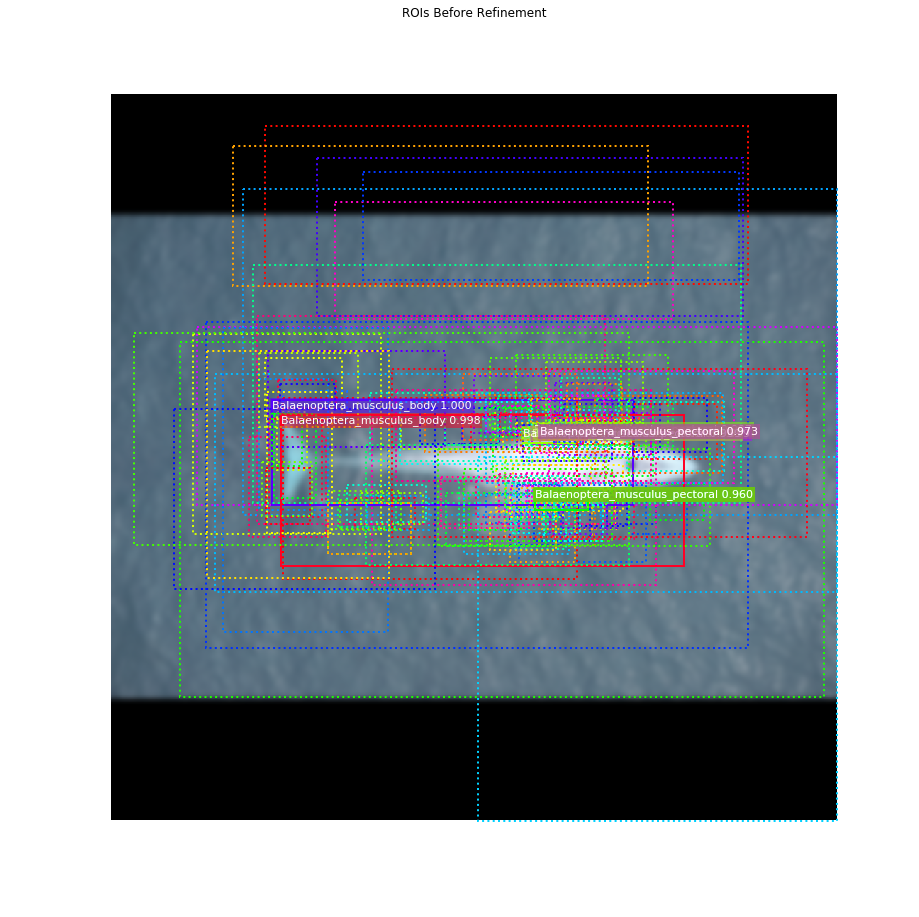

In [36]:
# Display a random sample of proposals.
# Proposals classified as background are dotted, and
# the rest show their class and confidence score.
limit = 200
ixs = np.random.randint(0, proposals.shape[0], limit)
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[ixs], roi_scores[ixs])]
visualize.draw_boxes(image, boxes=proposals[ixs],
                     visibilities=np.where(roi_class_ids[ixs] > 0, 2, 1),
                     captions=captions, title="ROIs Before Refinement",
                     ax=get_ax())

#### Apply Bounding Box Refinement

roi_bbox_specific        shape: (1000, 4)             min:   -3.58861  max:    4.48122  float32
refined_proposals        shape: (1000, 4)             min: -159.00000  max: 1446.00000  int32


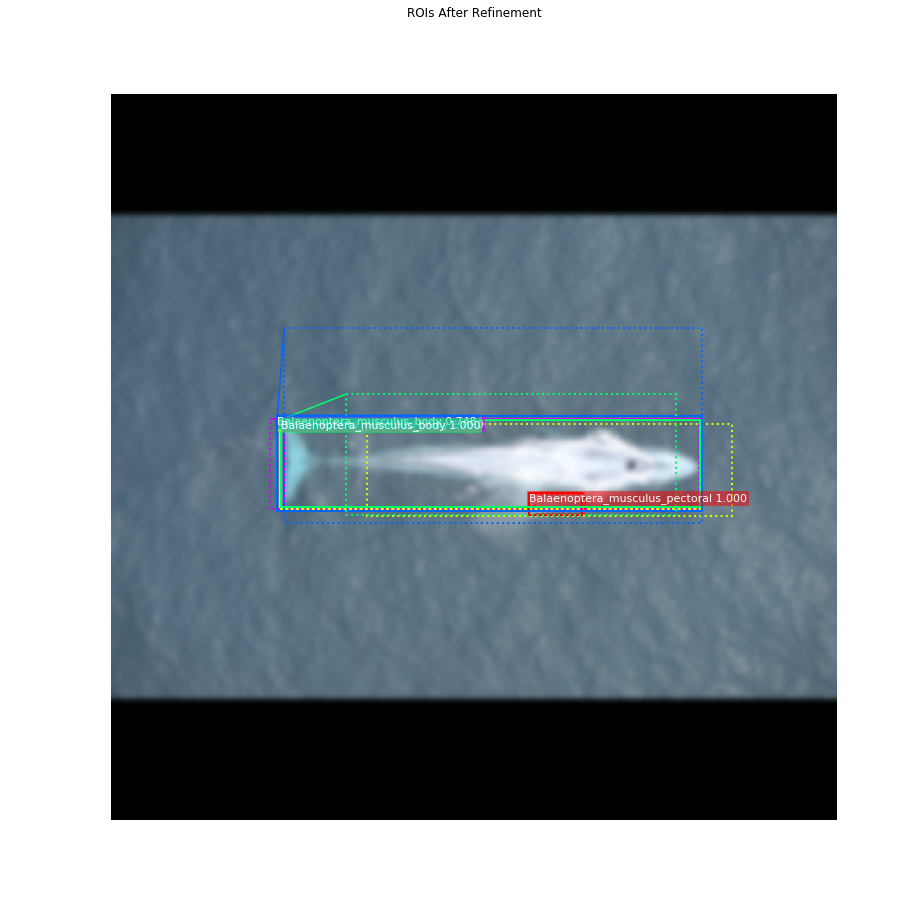

In [37]:
# Class-specific bounding box shifts.
roi_bbox_specific = mrcnn["deltas"][0, np.arange(proposals.shape[0]), roi_class_ids]
log("roi_bbox_specific", roi_bbox_specific)

# Apply bounding box transformations
# Shape: [N, (y1, x1, y2, x2)]
refined_proposals = utils.apply_box_deltas(
    proposals, roi_bbox_specific * config.BBOX_STD_DEV).astype(np.int32)
log("refined_proposals", refined_proposals)

# Show positive proposals
# ids = np.arange(roi_boxes.shape[0])  # Display all
limit = 5
ids = np.random.randint(0, len(roi_positive_ixs), limit)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[roi_positive_ixs][ids], roi_scores[roi_positive_ixs][ids])]
visualize.draw_boxes(image, boxes=proposals[roi_positive_ixs][ids],
                     refined_boxes=refined_proposals[roi_positive_ixs][ids],
                     visibilities=np.where(roi_class_ids[roi_positive_ixs][ids] > 0, 1, 0),
                     captions=captions, title="ROIs After Refinement",
                     ax=get_ax())

#### Filter Low Confidence Detections

In [38]:
# Remove boxes classified as background
keep = np.where(roi_class_ids > 0)[0]
print("Keep {} detections:\n{}".format(keep.shape[0], keep))

Keep 34 detections:
[  0   1   2   3   4   5   6   7   9  10  11  13  14  15  16  19  20  21
  25  28  29  33  35  36  45  48  49  50  58  59  72  79 130 137]


In [39]:
# Remove low confidence detections
keep = np.intersect1d(keep, np.where(roi_scores >= config.DETECTION_MIN_CONFIDENCE)[0])
print("Remove boxes below {} confidence. Keep {}:\n{}".format(
    config.DETECTION_MIN_CONFIDENCE, keep.shape[0], keep))

Remove boxes below 0.6 confidence. Keep 34:
[  0   1   2   3   4   5   6   7   9  10  11  13  14  15  16  19  20  21
  25  28  29  33  35  36  45  48  49  50  58  59  72  79 130 137]


#### Per-Class Non-Max Suppression

In [40]:
# Apply per-class non-max suppression
pre_nms_boxes = refined_proposals[keep]
pre_nms_scores = roi_scores[keep]
pre_nms_class_ids = roi_class_ids[keep]

nms_keep = []
for class_id in np.unique(pre_nms_class_ids):
    # Pick detections of this class
    ixs = np.where(pre_nms_class_ids == class_id)[0]
    # Apply NMS
    class_keep = utils.non_max_suppression(pre_nms_boxes[ixs], 
                                            pre_nms_scores[ixs],
                                            config.DETECTION_NMS_THRESHOLD)
    # Map indicies
    class_keep = keep[ixs[class_keep]]
    nms_keep = np.union1d(nms_keep, class_keep)
    print("{:22}: {} -> {}".format(dataset.class_names[class_id][:20], 
                                   keep[ixs], class_keep))

keep = np.intersect1d(keep, nms_keep).astype(np.int32)
print("\nKept after per-class NMS: {}\n{}".format(keep.shape[0], keep))

Balaenoptera_musculu  : [  0   6   9  10  13  14  29  35  36  49  50  59  72  79 137] -> [0]
Balaenoptera_musculu  : [  1   2   3   4   5   7  11  15  16  19  20  21  25  28  33  45  48  58
 130] -> [2 1]

Kept after per-class NMS: 3
[0 1 2]


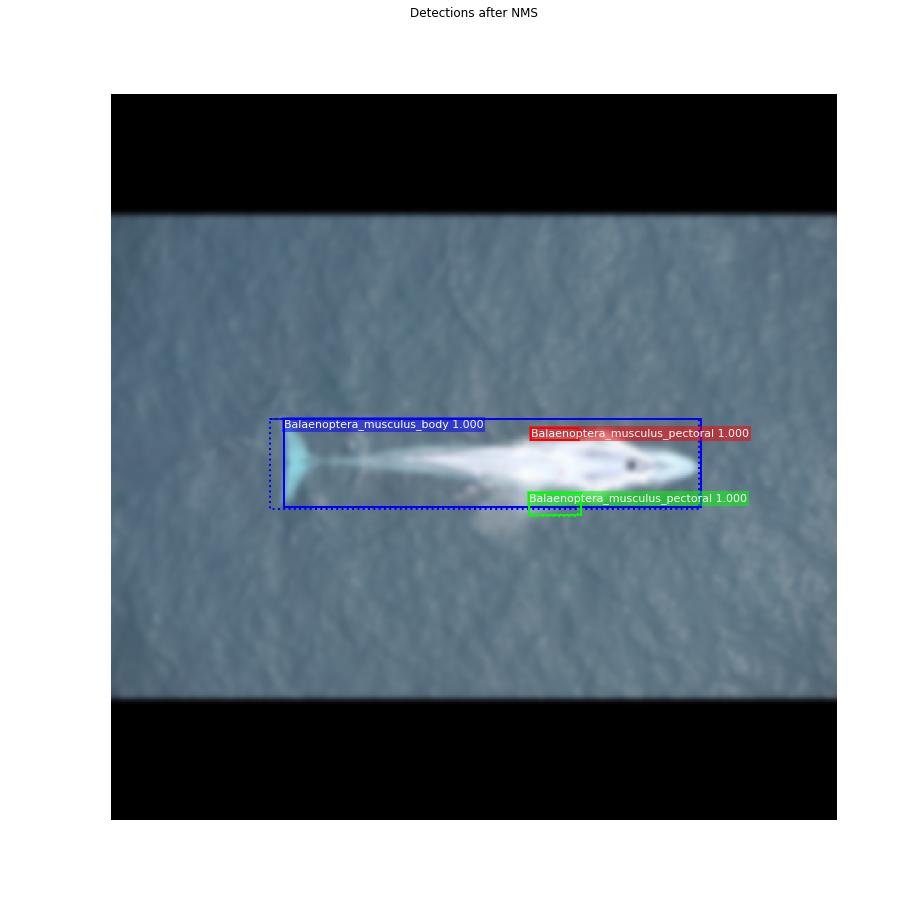

In [41]:
# Show final detections
ixs = np.arange(len(keep))  # Display all
# ixs = np.random.randint(0, len(keep), 10)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[keep][ixs], roi_scores[keep][ixs])]
visualize.draw_boxes(
    image, boxes=proposals[keep][ixs],
    refined_boxes=refined_proposals[keep][ixs],
    visibilities=np.where(roi_class_ids[keep][ixs] > 0, 1, 0),
    captions=captions, title="Detections after NMS",
    ax=get_ax())

## Stage 3: Generating Masks

This stage takes the detections (refined bounding boxes and class IDs) from the previous layer and runs the mask head to generate segmentation masks for every instance.

### 3.a Mask Targets

These are the training targets for the mask branch

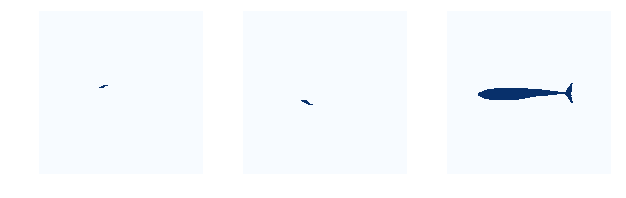

In [42]:
display_images(np.transpose(gt_mask, [2, 0, 1]), cmap="Blues")

### 3.b Predicted Masks

In [43]:
# Get predictions of mask head
mrcnn = model.run_graph([image], [
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

detections               shape: (1, 100, 6)           min:    0.00000  max:    2.00000  float32
masks                    shape: (1, 100, 56, 56, 3)   min:    0.00000  max:    1.00000  float32
3 detections: ['Balaenoptera_musculus_body' 'Balaenoptera_musculus_pectoral'
 'Balaenoptera_musculus_pectoral']


In [44]:
# Masks
det_boxes = utils.denorm_boxes(mrcnn["detections"][0, :, :4], image.shape[:2])
det_mask_specific = np.array([mrcnn["masks"][0, i, :, :, c] 
                              for i, c in enumerate(det_class_ids)])
det_masks = np.array([utils.unmold_mask(m, det_boxes[i], image.shape)
                      for i, m in enumerate(det_mask_specific)])
log("det_mask_specific", det_mask_specific)
log("det_masks", det_masks)

det_mask_specific        shape: (3, 56, 56)           min:    0.00000  max:    1.00000  float32
det_masks                shape: (3, 1024, 1024)       min:    0.00000  max:    1.00000  bool


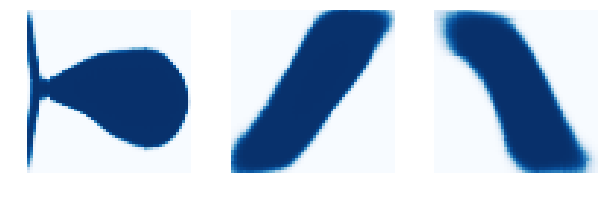

In [45]:
display_images(det_mask_specific[:4] * 255, cmap="Blues", interpolation="none")

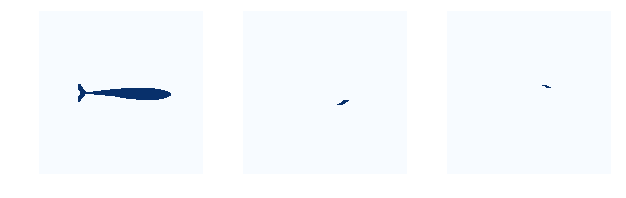

In [46]:
display_images(det_masks[:4] * 255, cmap="Blues", interpolation="none")

## Visualize Activations

In some cases it helps to look at the output from different layers and visualize them to catch issues and odd patterns.

In [47]:
# Get activations of a few sample layers
activations = model.run_graph([image], [
    ("input_image",        model.keras_model.get_layer("input_image").output),
    ("res2c_out",          model.keras_model.get_layer("res2c_out").output),
    ("res3c_out",          model.keras_model.get_layer("res3c_out").output),
    ("res4w_out",          model.keras_model.get_layer("res4w_out").output),  # for resnet100
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

input_image              shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10001  float32
res2c_out                shape: (1, 256, 256, 256)    min:    0.00000  max:   18.51135  float32
res3c_out                shape: (1, 128, 128, 512)    min:    0.00000  max:   29.45926  float32
res4w_out                shape: (1, 64, 64, 1024)     min:    0.00000  max:   79.35609  float32
rpn_bbox                 shape: (1, 261888, 4)        min:   -7.30426  max:  132.74570  float32
roi                      shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32


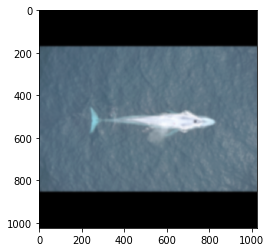

In [48]:
# Input image (normalized)
_ = plt.imshow(modellib.unmold_image(activations["input_image"][0],config))

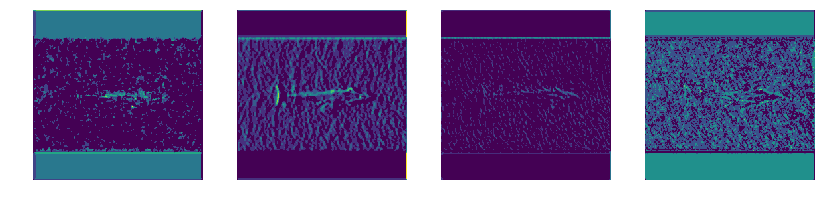

In [49]:
# Backbone feature map
display_images(np.transpose(activations["res2c_out"][0,:,:,:4], [2, 0, 1]), cols=4)